In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV


In [3]:
df=pd.read_csv("/content/-Upswing_Pune/hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
data=df.copy(deep=True)

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
data.size

3820480

In [8]:
data.shape

(119390, 32)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
data['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
data["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [14]:
# Encoding categorical variables
column_to_encode=['reservation_status']
label_encoder={}
for cloumn in column_to_encode:
    le=LabelEncoder()
    data['reservation_status']=le.fit_transform(data['reservation_status'])
    label_encoder['reservation_status']=le


In [15]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,1,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,1,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,1,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,1,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,1,2015-07-03


In [16]:
# Data Preprocessing

# Dropping irrelevant or highly null columns for this model
data_clean = data.drop(columns=['company', 'agent' ,'reservation_status_date'])

# Filling missing values in 'children' column with 0 (assuming no children if NaN)
data_clean['children'].fillna(0, inplace=True)

# Dropping remaining rows with missing values (e.g., 'country' has some NaNs)
data_clean.dropna(inplace=True)

# Separating target variable (is_canceled) and features
X = data_clean.drop(columns=['is_canceled'])
y = data_clean['is_canceled']

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encoding categorical columns and combining with numerical columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X_final = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)


In [17]:
X_final.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,737,2015,27,1,0,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,2015,27,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13,2015,27,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14,2015,27,1,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
X_encoded.head()

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
print(list(X_encoded.columns))


['hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI', 'country_BEL', 'country_BEN', 'country_BFA', 'country_BGD', 'country_BGR', 'country_BHR', 'country_BHS', 'country_BIH', 'country_BLR', 'country_BOL', 'country_BRA', 'country_BRB', 'country_BWA', 'country_CAF', 'country_CHE', 'country_CHL', 'country_CHN', 'country_CIV', 'country_CMR', 'country_CN', 'country_COL', 'country_COM', 'country_CPV', 'country_CRI', 'country_CUB', 'country_CYM', 'coun

In [20]:
print(list(X_final.columns))

['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI', 'countr

In [21]:
if "reservation_status_date" in list(X_final.columns):
    print("yes")
else:
    print("No")

No


In [22]:
corr=X_final.corr()
print(corr)

                               lead_time  arrival_date_year  \
lead_time                       1.000000           0.039974   
arrival_date_year               0.039974           1.000000   
arrival_date_week_number        0.126724          -0.540488   
arrival_date_day_of_month       0.002354          -0.000531   
stays_in_weekend_nights         0.083988           0.021678   
...                                  ...                ...   
deposit_type_Non Refund         0.379746          -0.066119   
deposit_type_Refundable         0.016513          -0.000817   
customer_type_Group            -0.031542          -0.011332   
customer_type_Transient        -0.172972           0.229029   
customer_type_Transient-Party   0.158542          -0.164290   

                               arrival_date_week_number  \
lead_time                                      0.126724   
arrival_date_year                             -0.540488   
arrival_date_week_number                       1.000000   
arrival

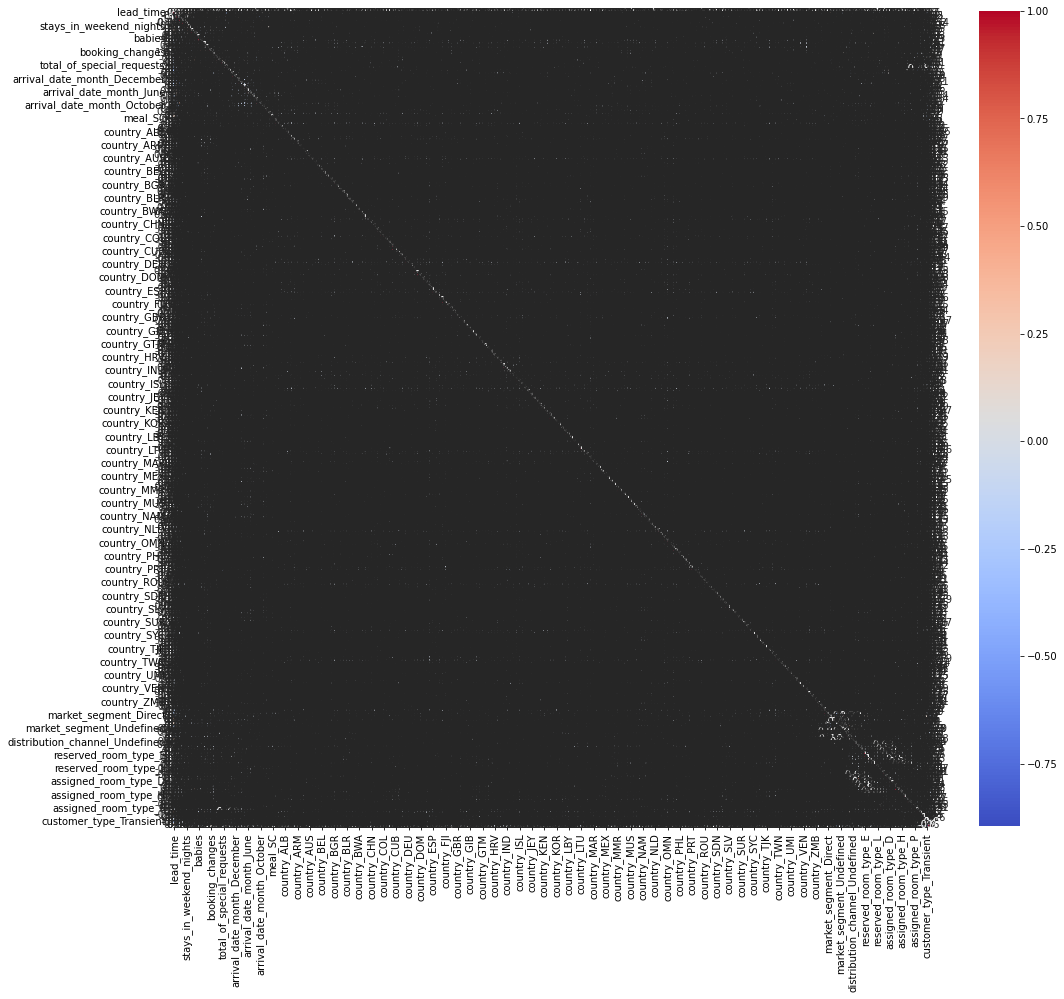

In [23]:

# Create a heatmap using seaborn
plt.figure(figsize=(17,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


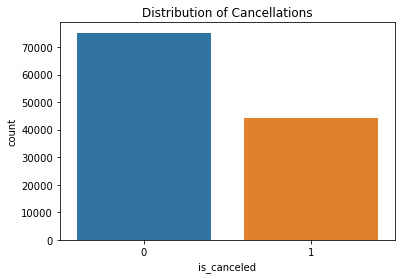

In [24]:
# Distribution of target variable (is_canceled)
plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=data)
plt.title('Distribution of Cancellations')
plt.show()







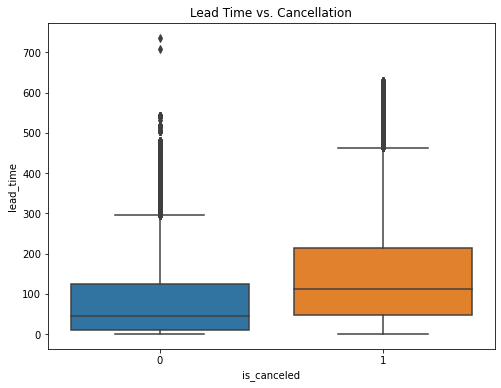

In [25]:
# Lead time vs. Cancellation
plt.figure(figsize=(8,6))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs. Cancellation')
plt.show()


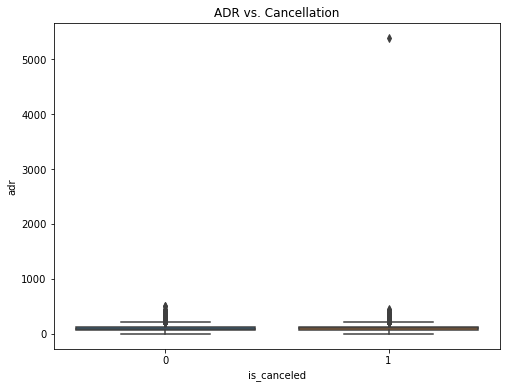

In [26]:
#. ADR (Average Daily Rate) vs. Cancellation
plt.figure(figsize=(8,6))
sns.boxplot(x='is_canceled', y='adr', data=data)
plt.title('ADR vs. Cancellation')
plt.show()

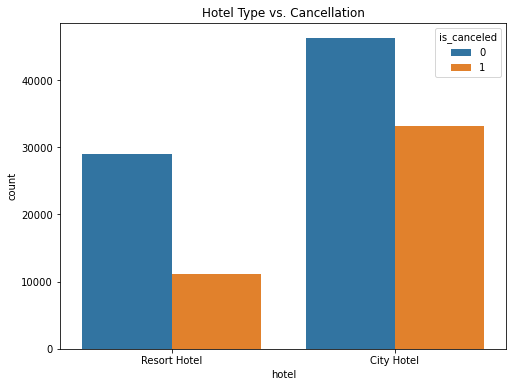

In [27]:
#  Hotel type vs. Cancellation
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.title('Hotel Type vs. Cancellation')
plt.show()

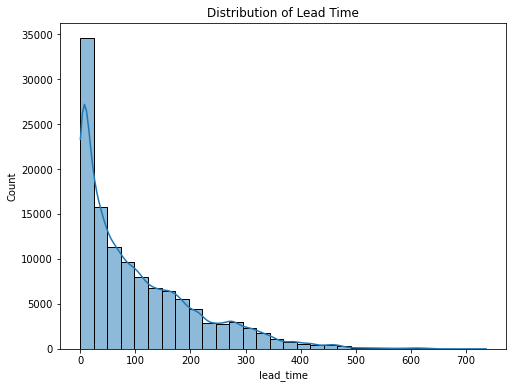

In [28]:

#  Distribution of Lead Time
plt.figure(figsize=(8,6))
sns.histplot(data['lead_time'], kde=True, bins=30)
plt.title('Distribution of Lead Time')
plt.show()

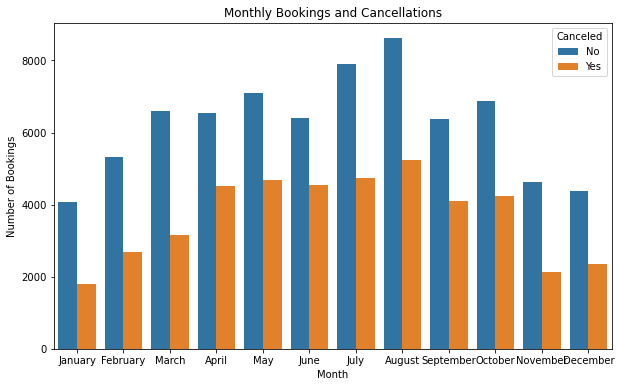

In [29]:
# Bookings and cancellations per month to identify seasonality
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=data_clean,
              order=['January', 'February', 'March', 'April', 'May', 'June', 
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Bookings and Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

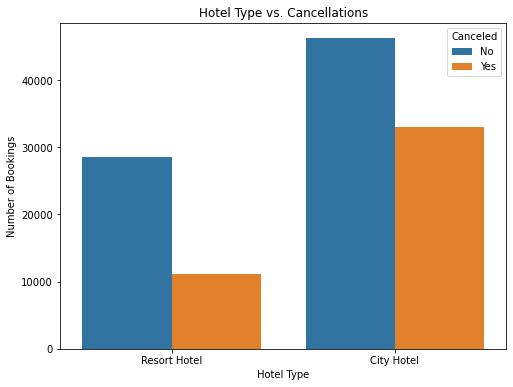

In [30]:
# Distribution of stays across hotel types (Resort vs City)
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', hue='is_canceled', data=data_clean)
plt.title('Hotel Type vs. Cancellations')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

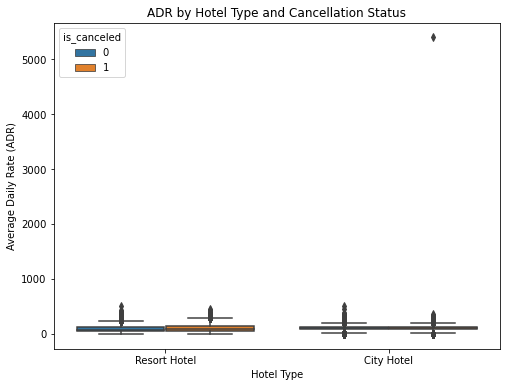

In [31]:
# ADR trends by hotel type and cancellation status
plt.figure(figsize=(8,6))
sns.boxplot(x='hotel', y='adr', hue='is_canceled', data=data_clean)
plt.title('ADR by Hotel Type and Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

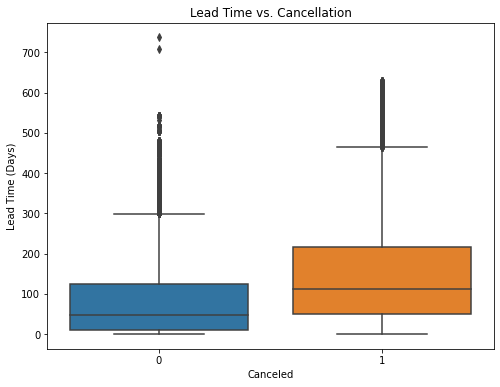

In [32]:
# Lead time vs cancellation
plt.figure(figsize=(8,6))
sns.boxplot(x='is_canceled', y='lead_time', data=data_clean)
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time (Days)')
plt.show()

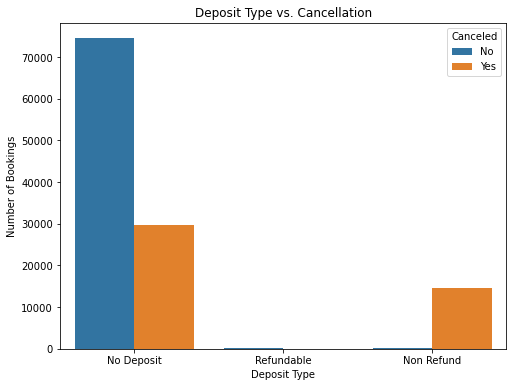

In [33]:
# Deposit type vs cancellation
plt.figure(figsize=(8,6))
sns.countplot(x='deposit_type', hue='is_canceled', data=data_clean)
plt.title('Deposit Type vs. Cancellation')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

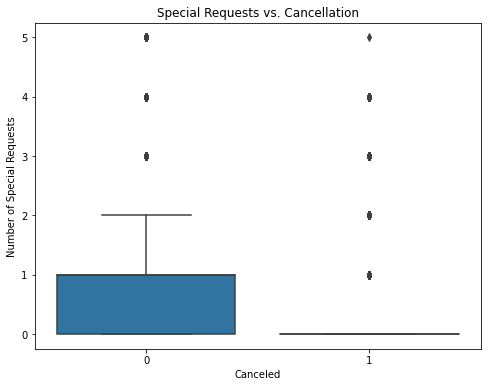

In [34]:
# Special requests vs cancellation
plt.figure(figsize=(8,6))
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=data_clean)
plt.title('Special Requests vs. Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Number of Special Requests')
plt.show()

In [35]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


In [36]:


# Building the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)





C:\Users\91776\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicting on the test data 
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Precision: 0.96
Recall: 0.88
F1-Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     22353
           1       0.96      0.88      0.92     13318

    accuracy                           0.94     35671
   macro avg       0.95      0.93      0.94     35671
weighted avg       0.94      0.94      0.94     35671


Confusion Matrix:
[[21832   521]
 [ 1566 11752]]


In [38]:
# hyperparameter tunning

In [40]:
'''
Lr = LogisticRegression()




# Define the hyperparameter grid to search
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength (smaller values for stronger regularization)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['liblinear', 'saga'],            # Solvers for 'l1', 'l2', and 'elasticnet'
    'max_iter': [100, 200, 500]                 # Maximum number of iterations
}

# Set up the grid search
Random_search = RandomizedSearchCV(estimator= Lr, param_distributions=param_distributions, n_jobs=-1, cv=5, verbose=2)

# Fit the model to the training data
Random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = Random_search.best_params_
best_model = Random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the tuned model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")'''

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\91776\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91776\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91776\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91776\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Valu

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Accuracy: 0.9890667488996664


In [43]:


'''model_bundle = {
    'model': best_model,
    'label_encoder': label_encoder,  
    'one_hot_encoder':encoder
}

# Save the entire bundle to a pickle file
model_filename = "hotel_booking_logistic_model_with_encoders.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(model_bundle, model_file)

print(f"Model and encoders saved as {model_filename}")'''

Model and encoders saved as hotel_booking_logistic_model_with_encoders.pkl
